In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv("baseballdatabank-master\core\Batting.csv")
df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.00,0.00,0.00,0,0.00,NaN,NaN,NaN,NaN,0.00
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.00,8.00,1.00,4,0.00,NaN,NaN,NaN,NaN,0.00
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.00,3.00,1.00,2,5.00,NaN,NaN,NaN,NaN,1.00
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.00,1.00,1.00,0,2.00,NaN,NaN,NaN,NaN,0.00
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.00,6.00,2.00,2,1.00,NaN,NaN,NaN,NaN,0.00


In [4]:
#get column names, data type, and check for columns with null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108789 entries, 0 to 108788
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  108789 non-null  object 
 1   yearID    108789 non-null  int64  
 2   stint     108789 non-null  int64  
 3   teamID    108789 non-null  object 
 4   lgID      108052 non-null  object 
 5   G         108789 non-null  int64  
 6   AB        108789 non-null  int64  
 7   R         108789 non-null  int64  
 8   H         108789 non-null  int64  
 9   2B        108789 non-null  int64  
 10  3B        108789 non-null  int64  
 11  HR        108789 non-null  int64  
 12  RBI       108033 non-null  float64
 13  SB        106421 non-null  float64
 14  CS        85248 non-null   float64
 15  BB        108789 non-null  int64  
 16  SO        106689 non-null  float64
 17  IBB       72139 non-null   float64
 18  HBP       105973 non-null  float64
 19  SH        102721 non-null  float64
 20  SF  

In [3]:
#find general summary data for column w numerical data
df.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,"108,789.00","108,789.00","108,789.00","108,789.00","108,789.00","108,789.00","108,789.00","108,789.00","108,789.00","108,033.00","106,421.00","85,248.00","108,789.00","106,689.00","72,139.00","105,973.00","102,721.00","72,686.00","83,348.00"
mean,"1,967.22",1.08,50.74,139.24,18.48,36.39,6.20,1.25,2.85,16.79,2.92,1.18,12.84,20.56,1.06,1.06,2.20,1.02,2.89
std,39.75,0.29,46.89,183.60,28.04,52.19,9.63,2.60,6.37,26.23,7.61,2.68,20.60,28.51,2.71,2.29,4.15,1.93,4.67
min,"1,871.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,937.00",1.00,12.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,"1,976.00",1.00,34.00,46.00,4.00,8.00,1.00,0.00,0.00,3.00,0.00,0.00,2.00,9.00,0.00,0.00,0.00,0.00,0.00
75%,"2,001.00",1.00,79.00,224.00,27.00,56.00,9.00,1.00,2.00,24.00,2.00,1.00,18.00,29.00,1.00,1.00,3.00,1.00,4.00
max,"2,020.00",5.00,165.00,716.00,198.00,262.00,67.00,36.00,73.00,191.00,138.00,42.00,232.00,223.00,120.00,51.00,67.00,19.00,36.00


In [5]:
#correlation table
df.corr()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
yearID,1.00,0.01,-0.00,-0.11,-0.12,-0.11,-0.03,-0.27,0.14,-0.07,-0.18,-0.13,-0.04,0.12,-0.08,-0.05,-0.33,-0.03,-0.04
stint,0.01,1.00,-0.12,-0.10,-0.09,-0.09,-0.09,-0.07,-0.07,-0.09,-0.06,-0.06,-0.08,-0.09,-0.07,-0.06,-0.07,-0.08,-0.08
G,-0.00,-0.12,1.00,0.94,0.89,0.92,0.88,0.65,0.67,0.87,0.55,0.64,0.84,0.80,0.61,0.60,0.48,0.76,0.82
AB,-0.11,-0.10,0.94,1.00,0.95,0.99,0.93,0.71,0.70,0.92,0.61,0.68,0.87,0.82,0.64,0.63,0.50,0.81,0.87
R,-0.12,-0.09,0.89,0.95,1.00,0.97,0.92,0.74,0.73,0.93,0.66,0.69,0.89,0.77,0.65,0.64,0.45,0.79,0.81
H,-0.11,-0.09,0.92,0.99,0.97,1.00,0.95,0.74,0.71,0.94,0.62,0.69,0.87,0.77,0.65,0.63,0.49,0.81,0.87
2B,-0.03,-0.09,0.88,0.93,0.92,0.95,1.00,0.65,0.73,0.92,0.53,0.62,0.84,0.78,0.63,0.61,0.40,0.79,0.83
3B,-0.27,-0.07,0.65,0.71,0.74,0.74,0.65,1.00,0.35,0.66,0.63,0.66,0.59,0.44,0.41,0.45,0.53,0.54,0.55
HR,0.14,-0.07,0.67,0.70,0.73,0.71,0.73,0.35,1.00,0.84,0.27,0.37,0.73,0.80,0.66,0.50,0.06,0.70,0.70
RBI,-0.07,-0.09,0.87,0.92,0.93,0.94,0.92,0.66,0.84,1.00,0.51,0.56,0.86,0.79,0.70,0.61,0.37,0.83,0.84


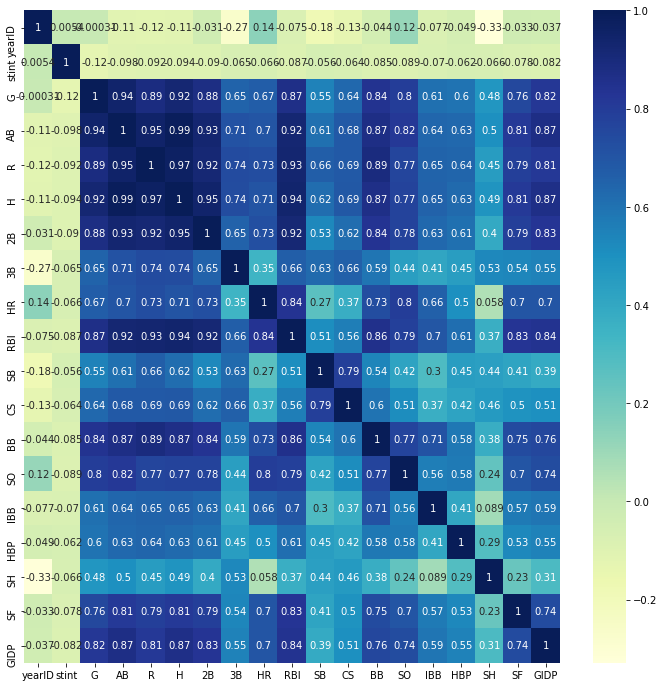

In [14]:
# plot correlation heatmap
fig, ax = plt.subplots(figsize=(12,12)) 
heatmap_plot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()